# **Company Classification**

**Classify businesses and companies across a standard taxonomy.**

**This dataset comes with pre-classified companies along with data from the website.**

**The main objective is to cluster companies based on their description on the website.**

**Data Description -**

**1. website: The website of the company/business**

**2. company_name: The company/business name**

**3. homepage_text : Visible homepage text**

**4. h1: The heading 1 tags from the html of the home page**

**5. h2: The heading 2 tags from the html of the home page**

**6. h3: The heading 3 tags from the html of the home page**

**7. navlinktext: The visible titles of navigation links on the homepage (Ex: Home, Services,
Product, About Us, Contact Us)**

**8. metakeywords: The meta keywords in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)**

**9. metadescription: The meta description in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)**

In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as msno
from nltk.corpus import stopwords

In [2]:
company_df = pd.read_csv('data_company_classification.csv')
company_df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [3]:
company_df.shape

(73974, 9)

In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


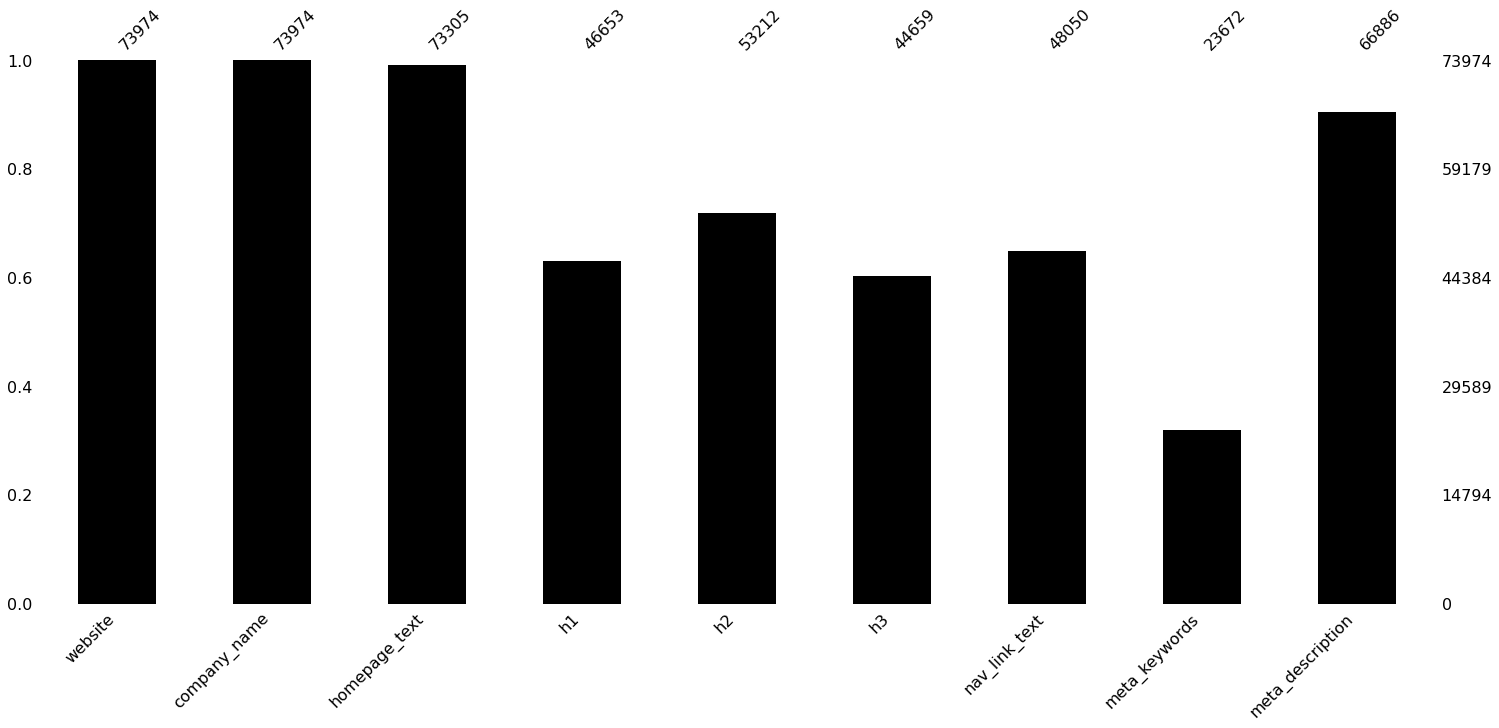

In [5]:
msno.bar(company_df, color='k')
plt.show()

In [6]:
company_df.nunique()

website             73803
company_name        73935
homepage_text       71739
h1                  44133
h2                  50732
h3                  42130
nav_link_text       46486
meta_keywords       23076
meta_description    65617
dtype: int64

In [7]:
company_df['description'] = company_df['h1'].fillna('')+' '+company_df['h2'].fillna('')+' '+company_df['h3'].fillna('')

In [8]:
company_df.drop(['h1', 'h2', 'h3'], axis=1, inplace=True)

In [9]:
company_df.head()

,website,company_name,homepage_text,nav_link_text,meta_keywords,meta_description,description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid...",
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...,Offering Bakersfield family medical care from ...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,...",Customer Reviews#sep#Welcome to Koops Overhea...
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,NaN,We would like to welcome you to Midtown Eyecar...,Welcome to our practice!
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,NaN,Repro Security provide a range of tailor made ...,Welcome to REPRO SECURITY Ltd


In [14]:
company_df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum()

homepage_text         669
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

In [15]:
company_df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In [16]:
company_df['null_count'] = company_df[['homepage_text', 'nav_link_text','meta_keywords',
                                       'meta_description']].isnull().sum(axis=1)

In [23]:
company_df.head()

,website,company_name,homepage_text,nav_link_text,meta_keywords,meta_description,description,text
0,bipelectric.com,bip dipietro electric inc,Electrici...,,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid...",,Electrici...
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...,Offering Bakersfield family medical care from ...,site map | en español Elias Medical h...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,...",Customer Reviews#sep#Welcome to Koops Overhea...,Home About Us Garage Door Repair & Servi...
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,,,We would like to welcome you to Midtown Eyecar...,Welcome to our practice!,918-599-0202 Type Size...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,,,Repro Security provide a range of tailor made ...,Welcome to REPRO SECURITY Ltd,Simply fill out our form below...


In [18]:
company_df = company_df[company_df['null_count']<3]

company_df.reset_index(inplace=True, drop=True)

In [19]:
company_df.drop('null_count', axis=1, inplace=True)

In [20]:
company_df.fillna('', inplace=True)

In [21]:
company_df['text'] = (company_df['homepage_text'] + ' ' + company_df['nav_link_text'] + ' ' 
                      + company_df['meta_keywords'] + ' ' + company_df['meta_description'] 
                      + ' ' + company_df['description'])

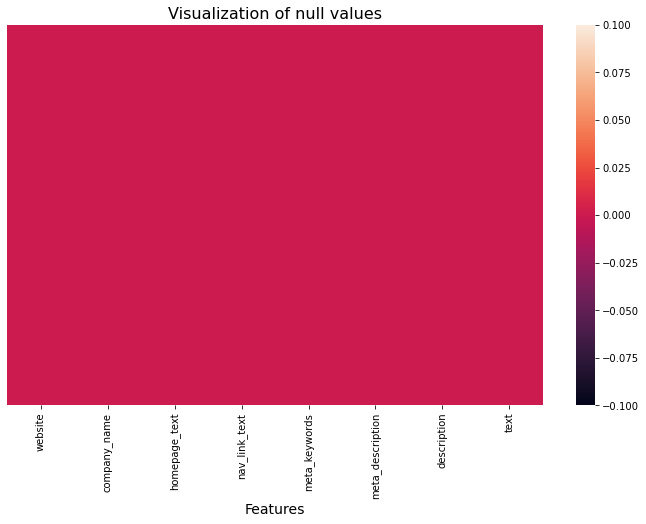

In [22]:
plt.figure(figsize=(12, 7))
sns.heatmap(company_df.isnull(), yticklabels=False)
plt.title('Visualization of null values', size=16)
plt.xlabel('Features', size=14)
plt.show()